# MNIST DATASET

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# load MNIST dataset: handwritten digits from 0-9.
# the loaded data are numpy arrays
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# shape of training and test data
print(x_train.shape, x_test.shape)

# subset only digit zero
x_train, y_train = x_train[np.where(y_train == 0)], y_train[np.where(y_train == 0)]
x_test, y_test = x_test[np.where(y_test == 0)], y_test[np.where(y_test == 0)]
x = np.concatenate([x_train, x_test], axis=0)

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)
(5923, 28, 28) (980, 28, 28)


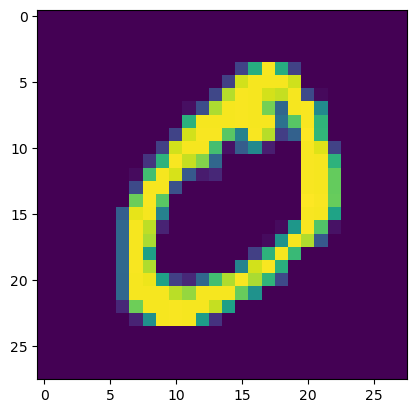

In [24]:
plt.imshow(x_train[0])

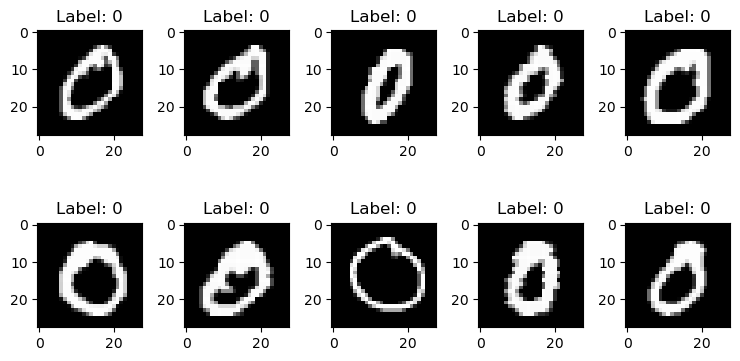

In [29]:
num_row = 2
num_col = 5
num = 10
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

# DISCRIMINATOR

The discriminator is akin to the role of a critic for work of art, except that here it's not a human but a neural network.

In [34]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization
from tensorflow.keras.layers import LeakyReLU

In [35]:
# parameters of the convolutional layers follow the original DCGAN paper.
# note that MNIST dataset has shape (28 x 28) and 1 color channel (RGB).
discriminator = Sequential([
    # 64 filters, kernel/convolution window size 3 
    Conv2D(64, 3, strides=2, input_shape=(28, 28, 1)),
    LeakyReLU(),
    BatchNormalization(),

    # 2nd conv block
    Conv2D(128, 5, strides=2),
    LeakyReLU(),
    BatchNormalization(),

    # 3rd conv block
    Conv2D(256, 5, strides=2),
    LeakyReLU(),
    BatchNormalization(),

    Flatten(), # make 2D tensors
    Dense(1, activation='sigmoid') # classify real or fake
])

2024-05-22 17:54:14.725586: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: UNKNOWN ERROR (100)


In [37]:
# parameters for the Adam optimizer follow the DCGAN paper
opt = tf.keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5)
discriminator.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [38]:
discriminator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 1, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,027,073 (3.92 MB)

 Trainable params: 1,026,177 (3.91 MB)

 Non-trainable params: 896 (3.50 KB)

# GENERATOR

In [ ]:
generator = Sequential([
    Dense(256, activation='relu', input_shape=(noise_dim,)),
    Reshape((1, 1, 256)),
    
    Conv2DTranspose(256, 5, activation='relu'),
    BatchNormalization(),

    Conv2DTranspose(128, 5, activation='relu'),
    BatchNormalization(),

    Conv2DTranspose(64, 5, strides=2, activation='relu'),
    BatchNormalization(),
    
    Conv2DTranspose(32, 5, activation='relu'),
    BatchNormalization(),

    Conv2DTranspose(1, 4, activation='sigmoid')
])